# Men's Team Pursuit World Record

History of Men's Team Pursuit World Record, following Denmark smashing the previous record by 3.34s during the 2020 World Championships

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import datetime

In [2]:
# Scrape data from wikipedia
page = 'https://en.wikipedia.org/wiki/World_record_progression_track_cycling_%E2%80%93_Men%27s_team_pursuit'
df = pd.read_html(page)[1]

In [3]:
# Take a look at the data
df.head(5)

,Time,Cyclist,"Velodrome, location",Track,Date,Meeting,Ref
0,4:03.840,AustraliaBrett AitkenStuart O'GradyTim O'Shane...,Hamar (NOR),Indoor,20 August 1993,NaN,NaN
1,4:00.958,ItalyAdler CapelliCristiano CittonAndrea Colli...,Manchester (GBR),Indoor,31 August 1996,NaN,NaN
2,4:00.830,UkraineOleksandr FedenkoOleksandr SymonenkoSer...,Sydney (AUS),Indoor,19 September 2000,2000 Olympics,[2]
3,3:59.710,GermanyGuido FulstRobert BartkoDaniel BeckeJen...,Sydney (AUS),Indoor,19 September 2000,2000 Olympics,[2]
4,3:59.583,AustraliaLuke RobertsMark RenshawPeter DawsonG...,Manchester (GBR),Indoor,1 August 2002,2002 Commonwealth Games,NaN


In [4]:
# Tidy up data
# Add a nation column, extracted from 'Cyclist' column
df['Nation'] = ""
for i in range(len(df)):
    df['Nation'].iloc[i] = re.findall('[A-Z][a-z]*', df['Cyclist'].iloc[i])[0]

In [5]:
# Change 'Great' to 'Great Britain'
df['Nation'][df['Nation']=='Great'] = 'Great Britain'

In [6]:
# Since often a team will break the record multiple times during one event, 
# work out when a new nation breaks it. Will be used later to add marker size to visualisation
df['Change'] = ""
holder = 'None'
for i in range(len(df)):
    if df['Nation'].iloc[i] != holder:
        holder = df['Nation'].iloc[i]
        df['Change'].iloc[i] = 1
    else :
        df['Change'].iloc[i]=0  

In [7]:
# Define color, marker edge color and marker size for each record - tried to make colors suitable for each nation!
df['MarkerColor'] = ""
df['MarkerEdge'] = ""
df['MarkerSize'] = ""
nations = df['Nation'].unique()
markercolors = ['green','dodgerblue','dodgerblue','black','blue','white']
markeredgecolors = ['gold','white','gold','gold','red','red']
for i in range(len(df)):
    ind = nations.tolist().index(df['Nation'].iloc[i])
    df['MarkerColor'].iloc[i] = markercolors[ind]
    df['MarkerEdge'].iloc[i] = markeredgecolors[ind]
    if df['Change'].iloc[i] == 1:
        df['MarkerSize'].iloc[i] = 15
    else:
        df['MarkerSize'].iloc[i] = 8

In [8]:
# Convert date column to datetime format
df['DateTime'] = pd.to_datetime(df['Date'])

# Convert record time to datetime format
df['Record'] = pd.to_datetime(df['Time'],format='%M:%S.%f')

In [9]:
# Create tickmarks lists
ytickvals =  ['03:40','03:42','03:44','03:46','03:48','03:50','03:52','03:54','03:56','03:58','04:00','04:02','04:04','04:06']
ytickvalstime = [datetime.datetime.strptime('1900-01-01 ' + str,'%Y-%m-%d %M:%S') for str in ytickvals]

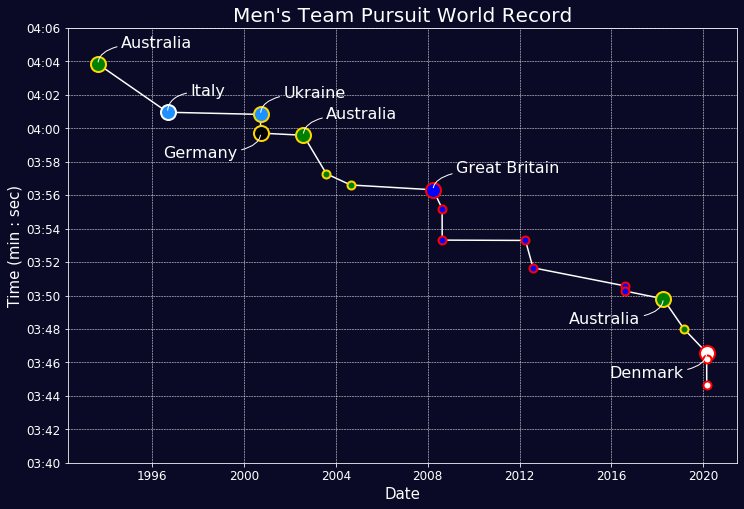

In [10]:
# Create visualisation 
# Some more imports required to make vis look cool!

from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import timedelta  

plt.rcParams['figure.facecolor']=(10/255, 10/255, 38/255) 
plt.rcParams['axes.facecolor']=(10/255, 10/255, 38/255)
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes.edgecolor']='white'

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df['DateTime'],df['Record'],'w')
#ax.plot(df['DateTime'],df['Record'],'wo',markeredgecolor='b',markersize=10)
for i in range(len(df)):
    ax.plot(df['DateTime'].iloc[i],df['Record'].iloc[i],'o',markeredgecolor=df['MarkerEdge'].iloc[i],
            markerfacecolor=df['MarkerColor'].iloc[i],markersize=df['MarkerSize'].iloc[i],markeredgewidth=2)
    if df['Change'].iloc[i] == 1:
        x = df['DateTime'].iloc[i]
        y = df['Record'].iloc[i]
        
        if i in [3,14,16]:
            offsetx = x + timedelta(days=-365)
            offsety = y+ timedelta(seconds=-1.5)
            hal = 'right'
        else:   
            offsetx = x + timedelta(days=365)
            offsety = y+ timedelta(seconds=1)
            hal = 'left'
        
        ax.annotate(df['Nation'].iloc[i],
                    xy=(x, y), xycoords='data',
                    xytext=(offsetx, offsety), textcoords='data',
                    fontsize = 16,
                    horizontalalignment=hal,
                    arrowprops=dict(arrowstyle="-",
                                    connectionstyle="angle3,angleA=0,angleB=-90",
                                   color='white'))

plt.yticks(ytickvalstime)
ax.yaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
ax.grid(color='w', linestyle='--', linewidth=0.5)


plt.xlabel('Date', fontsize=15 , color='white')
plt.ylabel('Time (min : sec)', fontsize=15 , color='white')
plt.tick_params(labelsize=12)
plt.title(label='Men\'s Team Pursuit World Record',fontsize=20)

plt.savefig('tp_record.png',bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')
